In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("train.csv")
df["datetime"] = pd.to_datetime(df["datetime"])

df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["hour"] = df["datetime"].dt.hour
df["weekday"] = df["datetime"].dt.weekday


**3.1**

***question 1***

In [2]:
df.groupby("season")["count"].mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

***question 2***

In [3]:
df.groupby("workingday")[["registered", "casual"]].mean()


,registered,casual
workingday,,
0,129.198330,59.308290
1,167.904209,25.107663


In [4]:
df.groupby(["year", "workingday"])[["registered", "casual"]].mean()


registered     casual
year workingday                       
2011 0            97.153132  48.201276
     1           124.031909  19.664143
2012 0           160.767429  70.250286
     1           211.587507  30.527733

***question 3***

In [5]:
df_2011 = df[df["year"] == 2011].groupby("month")["count"].sum()
df_2012 = df[df["year"] == 2012].groupby("month")["count"].sum()

df_2011, df_2012


(month
 1     23552
 2     32844
 3     38735
 4     50517
 5     79713
 6     89776
 7     92848
 8     83296
 9     79104
 10    79522
 11    70889
 12    61183
 Name: count, dtype: int64,
 month
 1      56332
 2      66269
 3      94766
 4     116885
 5     120434
 6     130957
 7     121769
 8     130220
 9     133425
 10    127912
 11    105551
 12     98977
 Name: count, dtype: int64)

***question 4***

In [6]:
df.groupby("weather")["count"].mean()


weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

***question 5***

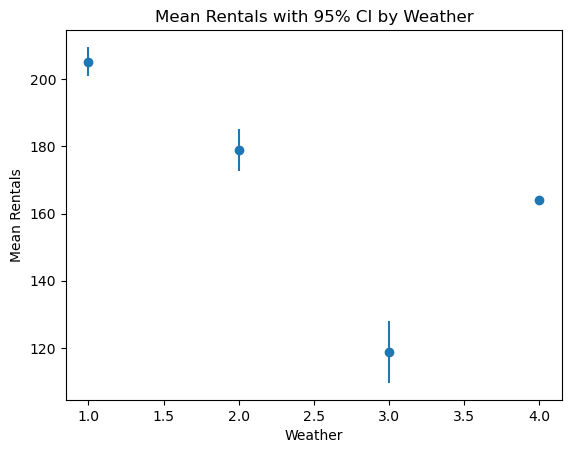

In [7]:
weather_stats = df.groupby("weather")["count"].agg(["mean", "count", "std"])
weather_stats["ci95"] = 1.96 * weather_stats["std"] / np.sqrt(weather_stats["count"])

plt.errorbar(
    weather_stats.index,
    weather_stats["mean"],
    yerr=weather_stats["ci95"],
    fmt="o"
)
plt.xlabel("Weather")
plt.ylabel("Mean Rentals")
plt.title("Mean Rentals with 95% CI by Weather")
plt.show()


***question 6***

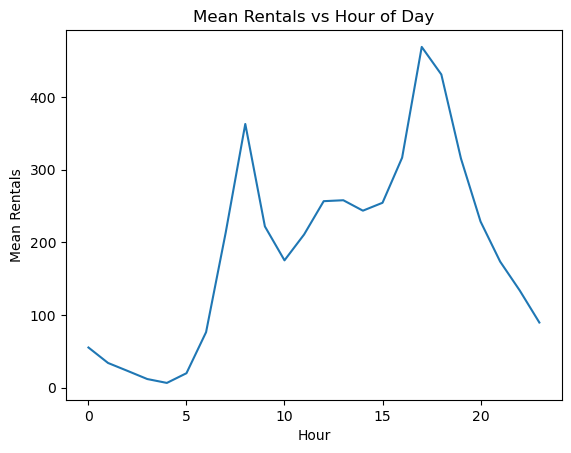

In [8]:
hourly_mean = df.groupby("hour")["count"].mean()

plt.plot(hourly_mean.index, hourly_mean.values)
plt.xlabel("Hour")
plt.ylabel("Mean Rentals")
plt.title("Mean Rentals vs Hour of Day")
plt.show()


***question 7***

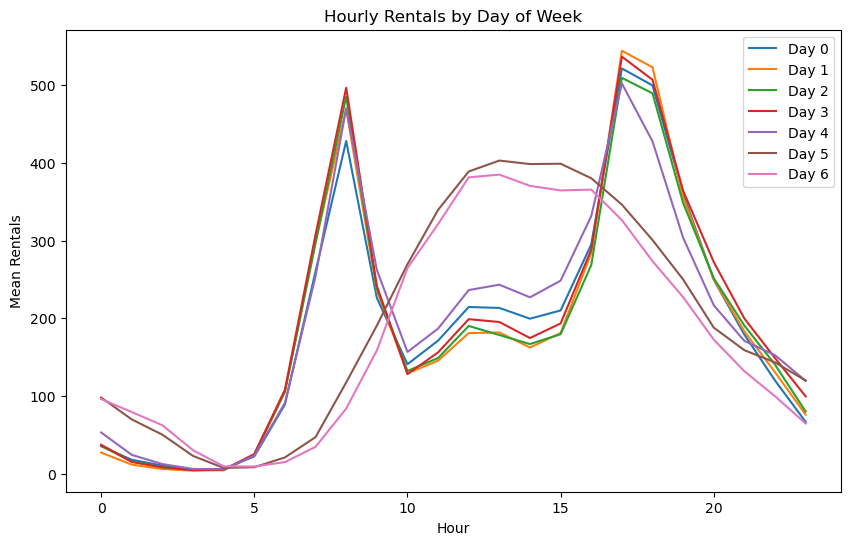

In [9]:
plt.figure(figsize=(10,6))
for d in range(7):
    subset = df[df["weekday"] == d].groupby("hour")["count"].mean()
    plt.plot(subset.index, subset.values, label=f"Day {d}")

plt.legend()
plt.xlabel("Hour")
plt.ylabel("Mean Rentals")
plt.title("Hourly Rentals by Day of Week")
plt.show()


***question 8***

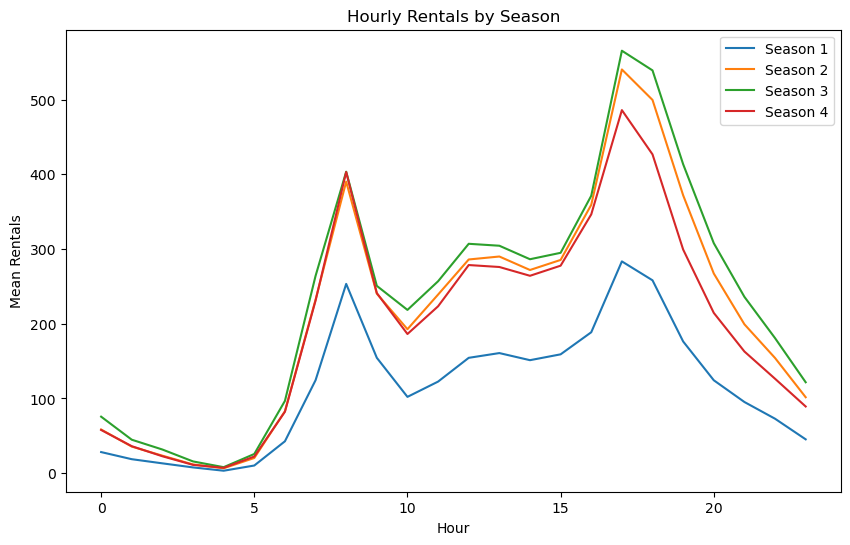

In [10]:
plt.figure(figsize=(10,6))
for s in sorted(df["season"].unique()):
    subset = df[df["season"] == s].groupby("hour")["count"].mean()
    plt.plot(subset.index, subset.values, label=f"Season {s}")

plt.legend()
plt.xlabel("Hour")
plt.ylabel("Mean Rentals")
plt.title("Hourly Rentals by Season")
plt.show()


In [11]:
def day_period(h):
    if 0 <= h < 6:
        return "night"
    elif 6 <= h < 12:
        return "morning"
    elif 12 <= h < 18:
        return "afternoon"
    else:
        return "evening"

df["day_period"] = df["hour"].apply(day_period)


In [12]:
df.groupby("day_period")["count"].mean()


day_period
afternoon    299.529240
evening      228.518640
morning      209.948718
night         25.177720
Name: count, dtype: float64

In [13]:
stats_dp = df.groupby(["day_period", "workingday"])["count"].agg(["mean", "count", "std"])
stats_dp["ci95"] = 1.96 * stats_dp["std"] / np.sqrt(stats_dp["count"])
stats_dp


mean  count         std       ci95
day_period workingday                                          
afternoon  0           371.022989    870  164.833073  10.953195
           1           266.196141   1866  176.987130   8.030488
evening    0           180.182759    870  125.037955   8.308800
           1           251.054662   1866  188.267975   8.542337
morning    0           157.772414    870  144.752926   9.618864
           1           234.353763   1860  165.423104   7.517886
night      0            44.052083    864   41.923572   2.795487
           1            16.217582   1820   17.667254   0.811689

In [14]:
pd.pivot_table(
    df,
    values="count",
    index="day_period",
    columns="workingday",
    aggfunc="mean"
)


workingday,0,1
day_period,,
afternoon,371.022989,266.196141
evening,180.182759,251.054662
morning,157.772414,234.353763
night,44.052083,16.217582
